In [1]:
! nvidia-smi

Thu Aug  5 08:47:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import time
import re

In [4]:
### 데이터 불러오기 (정제 안 된 것)
PATH = '..'
PATH = '/content/drive/MyDrive/Github/Ryles_Practice'
train_pos = pd.read_csv(PATH + "/DATA/open/train_pos.csv")
test_pos = pd.read_csv(PATH + "/DATA/open/test_pos.csv")

In [5]:
train_pos = train_pos.fillna("없음")
test_pos = test_pos.fillna("없음")

#### 데이터 불러오기 (pos 및 특수문자 등 정제된 데이터임. 정제 방법은 깃허브 코드 참고)
#### https://github.com/Ryleyun91/Ryles_Practice/tree/main/DACON

In [6]:
train_name_key = [str(sent) for sent in train_pos['과제명'] + " " + train_pos['요약문_한글키워드']]
train_goal = [str(sent) for sent in train_pos['요약문_연구목표']]
train_cont = [str(sent) for sent in train_pos['요약문_연구내용']]
train_effect = [str(sent) for sent in train_pos['요약문_기대효과']]
test_name_key = [str(sent) for sent in test_pos['과제명'] + " " + test_pos['요약문_한글키워드']]
test_goal = [str(sent) for sent in test_pos['요약문_연구목표']]
test_cont = [str(sent) for sent in test_pos['요약문_연구내용']]
test_effect = [str(sent) for sent in test_pos['요약문_기대효과']]
train_label = [int(str(answer)) for answer in train_pos['label']]

In [7]:
# EDA
train_name_key_len = [len(str(sent).split()) for sent in train_name_key]
train_goal_len = [len(str(sent).split()) for sent in train_goal]
train_cont_len = [len(str(sent).split()) for sent in train_cont]
train_effect_len = [len(str(sent).split()) for sent in train_effect]
test_name_key_len = [len(str(sent).split()) for sent in test_name_key]
test_goal_len = [len(str(sent).split()) for sent in test_goal]
test_cont_len = [len(str(sent).split()) for sent in test_cont]
test_effect_len = [len(str(sent).split()) for sent in test_effect]

(array([3.5770e+03, 2.4114e+04, 1.3350e+04, 2.3770e+03, 1.4400e+02,
        1.2000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  2. ,  12.6,  23.2,  33.8,  44.4,  55. ,  65.6,  76.2,  86.8,
         97.4, 108. ]),
 <a list of 10 Patch objects>)

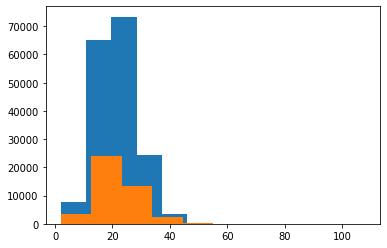

In [8]:
# name_key
import matplotlib.pyplot as plt
plt.hist(train_name_key_len)
plt.hist(test_name_key_len)

## max_len 30정도 주면 커버될 듯

(array([2.2964e+04, 1.3441e+04, 4.7240e+03, 1.6830e+03, 3.8000e+02,
        2.0100e+02, 8.8000e+01, 4.7000e+01, 3.2000e+01, 1.6000e+01]),
 array([  1.,  76., 151., 226., 301., 376., 451., 526., 601., 676., 751.]),
 <a list of 10 Patch objects>)

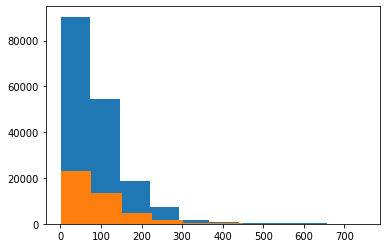

In [9]:
# goal
plt.hist(train_goal_len)
plt.hist(test_goal_len)

## max_len 200정도 주면 커버될 듯

(array([ 8611., 11596.,  9452.,  6106.,  3575.,  2255.,  1318.,   390.,
          212.,    61.]),
 array([  1. ,  76.5, 152. , 227.5, 303. , 378.5, 454. , 529.5, 605. ,
        680.5, 756. ]),
 <a list of 10 Patch objects>)

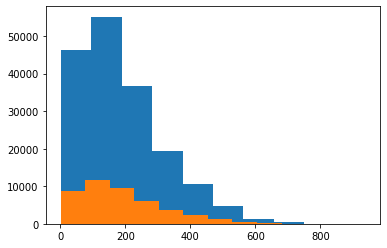

In [10]:
# cont
plt.hist(train_cont_len)
plt.hist(test_cont_len)

## max_len 400정도 주면 커버될 듯

(array([15151., 16053.,  7256.,  3403.,   802.,   460.,   245.,   103.,
           57.,    46.]),
 array([  1. ,  73.7, 146.4, 219.1, 291.8, 364.5, 437.2, 509.9, 582.6,
        655.3, 728. ]),
 <a list of 10 Patch objects>)

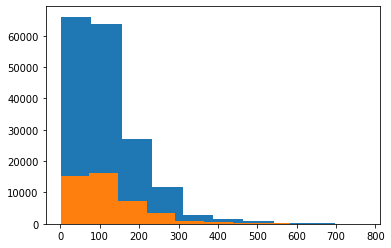

In [11]:
# effect
plt.hist(train_effect_len)
plt.hist(test_effect_len)

## max_len 250정도 주면 커버될 듯

In [12]:
train_concat = [str(name)+" "+str(key)+" "+" ".join(str(goal).split()[:250]) for name, key, goal in zip(train_pos['과제명'], train_pos['요약문_한글키워드'], train_pos['요약문_연구목표'])]
test_concat = [str(name)+" "+str(key)+" "+" ".join(str(goal).split()[:250]) for name, key, goal in zip(test_pos['과제명'], test_pos['요약문_한글키워드'], test_pos['요약문_연구목표'])]

(array([3265., 9364., 9550., 7431., 4744., 3365., 2189., 1236., 2150.,
         282.]),
 array([  3. ,  33.9,  64.8,  95.7, 126.6, 157.5, 188.4, 219.3, 250.2,
        281.1, 312. ]),
 <a list of 10 Patch objects>)

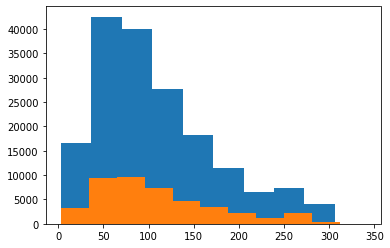

In [13]:
train_concat_len = [len(str(sent).split()) for sent in train_concat]
test_concat_len = [len(str(sent).split()) for sent in test_concat]
plt.hist(train_concat_len)
plt.hist(test_concat_len)

In [14]:
!pip install tensorflow-addons

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Flatten, Dropout
from tensorflow.keras import layers, models
import numpy as np

In [16]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from sklearn.metrics import f1_score
tf.random.set_seed(2021)
np.random.seed(2021)

In [17]:
def PAD(train_data, test_data, maxlen):
    train_data = np.array(train_data)
    test_data = np.array(test_data)
    tokenizer = Tokenizer(oov_token='<oov>')
    tokenizer.fit_on_texts(train_data)
    word_index = tokenizer.word_index
    train_seq = tokenizer.texts_to_sequences(train_data)
    test_seq = tokenizer.texts_to_sequences(test_data)
    train_pad = pad_sequences(train_seq, maxlen=maxlen, padding='post', truncating='post')
    test_pad = pad_sequences(test_seq, maxlen=maxlen, padding='post', truncating='post')
    vocab_size = len(word_index)+1 
    input_length = len(train_data)

    return train_pad, test_pad, vocab_size, input_length

In [18]:
def CNN(vocab_size, input_length, maxlen, embedding_dim):

    dropout = 0.5
    filter_sizes = (2,3,4,5)
    num_filters = 100
    
    # Convolutional block
    input_shape=(maxlen, )
    conv_blocks = []

    model_input = keras.layers.Input(shape=input_shape)

    z = keras.layers.Embedding(vocab_size, embedding_dim, input_length=input_length, name="embedding")(model_input)
    z = keras.layers.Dropout(dropout)(z)


    for sz in filter_sizes:
        conv = keras.layers.Conv1D(filters=num_filters,
                             kernel_size=sz,
                             padding="Same",
                             activation="relu",
                             strides=1)(z)
        conv = keras.layers.MaxPooling1D(pool_size=2)(conv)
        conv = keras.layers.Flatten()(conv)
        conv_blocks.append(conv)

    z = keras.layers.Concatenate()(conv_blocks)
    z = keras.layers.Dropout(dropout)(z)
    z = keras.layers.Dense(512, activation="relu")(z)
    z = keras.layers.Dropout(dropout)(z)
    z = keras.layers.Dense(256, activation="relu")(z)
    z = keras.layers.Dropout(dropout)(z)
    model_output = keras.layers.Dense(46, activation="softmax")(z)
    model = keras.Model(model_input, model_output)
    print(model.summary())
    model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=[tfa.metrics.F1Score(num_classes=46, average='macro')])

    return model

In [19]:
train_pad, test_pad, vocab_size, input_length = PAD(train_concat, test_concat, 200)

In [20]:
model = CNN(vocab_size, input_length, 200, 200)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 200)     21665800    input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 200, 200)     0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 200, 100)     40100       dropout[0][0]                    
______________________________________________________________________________________________

In [21]:
model.fit(train_pad, np.array(train_label), epochs=20, batch_size=1000, validation_split=0.1, verbose=2)

Epoch 1/20


ValueError: ignored

In [ ]:
answer = model.predict(test_pad)

In [ ]:
# 모델 예측
import tensorflow as tf
pred = tf.argmax(answer, axis=1)

In [ ]:
import numpy as np
np.sum(pred !=0)

In [ ]:
sample_submission=pd.read_csv('./open/sample_submission.csv')
sample_submission['label']=pred
sample_submission.to_csv('GRU_concat_0drop.csv', index=False)